# YoloV3 Barcode Detector

In [1]:
!git clone https://github.com/shilpiprd/Barcode_Identifier_YoloV3.git

Cloning into 'Barcode_Identifier_YoloV3'...
remote: Enumerating objects: 1841, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1841 (delta 10), reused 76 (delta 5), pack-reused 1759
Receiving objects: 100% (1841/1841), 248.85 MiB | 34.20 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
#upload the weights file in kaggle dataset and name ur dataset weights_file
!cp -r /kaggle/input/weights-file/weights /kaggle/working/Barcode_Identifier_YoloV3/

In [4]:
import torch
print(torch.cuda.is_available())

True


In [5]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [17]:
!ls 

Barcode_Identifier_YoloV3  __notebook_source__.ipynb


In [20]:
cd /kaggle/working/Barcode_Identifier_YoloV3/


/kaggle/working/Barcode_Identifier_YoloV3


In [21]:
!ls

 README.md     detect.py     results.json   ting	     vim.exe.stackdump
 __pycache__   detect_3.py   results.png    train.py	     weights
 cfg	       models.py     runs	   'ubdivisions=1'
 data	       output	     test.py	    utils


In [22]:
!python #after 100th epoch it starts to overfit, you can train only till 100 epochs
train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)
           device1 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (553 found, 0 missing, 273 empty, 0 duplicate, for 826 images): 1
Reading image shapes: 100%|██████████████████| 208/208 [00:01<00:00, 143.89it/s]
Caching labels (155 found, 0 missing, 53 empty, 0 duplicate, for 208 images): 10
Caching images (0.1GB): 100%|████████████████| 208/208 [00:01<00:00, 147.84it/s]
Image sizes 512 - 512

In [86]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/test_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)
           device1 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/214 data/customdata/test_images/20201211_2441_rgb.png: 512x512 Done. (0.042s)
image 2/214 data/customda

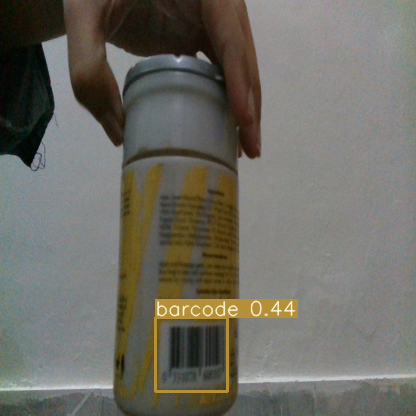

In [81]:
Image(filename = 'out_out/20201211_3090_rgb.png', width= 600)

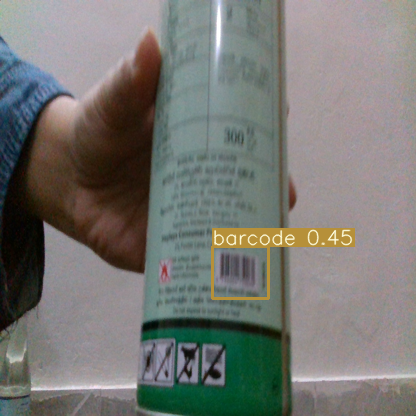

In [80]:
Image(filename = 'out_out/320201211_4178_rgb.png', width= 600)